## My first Kaggle competition : Titanic


In [31]:
import pandas as pd
train_data = pd.read_csv("train.csv", na_values=[""])
train_data.head(5)
# print(train_data.columns)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
print(train_data.describe())
#print(train_data.info)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Encoding binary Figures
For categorial figures

In [33]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan' and 'Int_Plan'
train_data['Sex'] = train_data['Sex'].replace({'male':0 , 'female':1})

# Print the results to verify
print(train_data['Sex'].head())
#print(train_data['Cabin'].head())
train_data.info()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


## Replace  missing value with a test statistic (Age)

In [34]:
age_mean_value = train_data['Age'].mean() 
train_data['Age'].fillna(age_mean_value, inplace = True)

train_data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S


## Test concerning the Cabin (Problem)
J'ai remplacer les NaN par "Z1" : why not !!!
J'aimerais bien récupérer la lettre de la cabine pour pouvoir faire du "one hot encoding" comme je l'ai fait pour la colonne "Embarked" mais cela ne fonctionne pas. Je pense que la récupération de la lettre n'est pas adéquate.

In [35]:
import re
train_data['Cabin'].fillna('Z1', inplace = True)
# train_data['Letter_Cabin']=train_data.Cabin.apply(lambda x: x.replace('d*', ''))
# train_data['Letter_Cabin']=train_data.Cabin.apply(lambda x: re.findall('^[A-Z]', x))
train_data['Letter_Cabin']=train_data.Cabin.apply(lambda x: re.findall('^[a-zA-Z]', x)[0])
# train_data['Letter_Cabin']=train_data.Cabin.apply(lambda x: re.findall(r'^\W', x))
# train_data['Cabin'].split('[A-Z]+', train_data['Cabin'])
train_data.info()
train_data.head(7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null int64
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           891 non-null object
Embarked        889 non-null object
Letter_Cabin    891 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Letter_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,Z1,S,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,Z1,S,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,Z1,S,Z
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Z1,Q,Z
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S,E


In [36]:
train_data['Embarked'].unique()

# Perform one hot encoding on 'State'
train_data_Emb = pd.get_dummies(train_data['Embarked'])

# Print the head of telco_state
print(train_data_Emb.head())
train_data['Embarked'].unique()

#New_train_data = pd.merge(left=train_data,right=train_data_Emb,left_on="PassengerId",right_on="C")
train_data = pd.concat([train_data,train_data_Emb], axis=1)
#New_train_data.head(20)
train_data.head(5)

   C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Letter_Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Z1,S,Z,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Z1,S,Z,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Z1,S,Z,0,0,1


### En effet, le code ci dessous ne fonctionne pas pour la lettre de la cabine...

In [37]:
train_data['Letter_Cabin'].unique()

# Perform one hot encoding on 'State'
train_data_Cab = pd.get_dummies(train_data['Letter_Cabin'])

# Print the head of telco_state
print(train_data_Cab.head())
train_data['Letter_Cabin'].unique()

#New_train_data = pd.merge(left=train_data,right=train_data_Emb,left_on="PassengerId",right_on="C")
train_data = pd.concat([train_data,train_data_Cab], axis=1)
#New_train_data.head(20)
train_data.head(5)

   A  B  C  D  E  F  G  T  Z
0  0  0  0  0  0  0  0  0  1
1  0  0  1  0  0  0  0  0  0
2  0  0  0  0  0  0  0  0  1
3  0  0  1  0  0  0  0  0  0
4  0  0  0  0  0  0  0  0  1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,S,A,B,C,D,E,F,G,T,Z
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,0,0,0,0,0,0,0,0,1


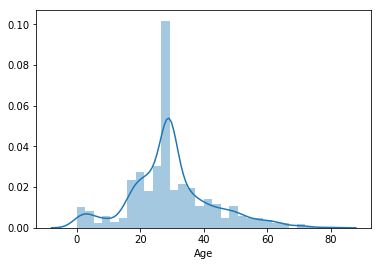

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
train_data['Age']=train_data['Age'].astype('int64')
sns.distplot(train_data['Age'])
plt.show()

### Après mon idée eut été de faire des blocs d'ages (en me disant que les bébés, les ados et les personnes agées ont peut-être été prioritaires pour embarquer sur les radeaux) mais ma fonction pd.qcut que j'avais déjà utilisée ne fonctionne pas... (Problème)

In [39]:
print(train_data.describe())
print(train_data['Age'].dtype)
train_data.head(5)

#train_data['Disc_Age'] = pd.qcut(train_data["Age"], 5)
#train_data['Disc_Age'].unique()

train_data['Disc_Age1'] = pd.qcut(train_data["Age"],[0.1,0.2,0.6,0.9])
train_data.groupby('Disc_Age1').size()

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.544332   
std     257.353842    0.486592    0.836071    0.477990   13.013778   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   29.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare           C           Q           S  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.523008    0.381594   32.204208    0.188552    0.086420    0.722783   
std      1.102743    0.806057   49.693429    0.391372    0.281141    0.447876   
min      0.000000    0.000000    0.000000    

Disc_Age1
(15.999, 20.0]     97
(20.0, 29.0]      381
(29.0, 47.0]      241
dtype: int64

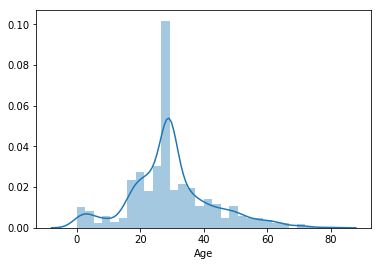

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train_data['Age'])
plt.show()

In [41]:
# Drop the unnecessary features
train_data = train_data.drop(train_data[['PassengerId','Name','Ticket','Cabin','Embarked','Letter_Cabin','Disc_Age1']], axis=1)
# Create the new feature
#telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']
print(train_data.columns)
train_data.info()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
A           891 non-null uint8
B           891 non-null uint8
C           891 non-null uint8
D           891 non-null uint8
E           891 non-null uint8
F           891 non-null uint8
G           891 non-null uint8
T           891 non-null uint8
Z           891 non-null uint8
dtypes: float64(1), int64(6), uint8(12)
memory usage: 59.2 KB


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
A           891 non-null uint8
B           891 non-null uint8
C           891 non-null uint8
D           891 non-null uint8
E           891 non-null uint8
F           891 non-null uint8
G           891 non-null uint8
T           891 non-null uint8
Z           891 non-null uint8
dtypes: float64(1), int64(6), uint8(12)
memory usage: 59.2 KB


In [43]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = train_data.drop('Survived', axis=1)

# Create target variable
y = train_data['Survived']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Just to see if it works
print(len(X_train))
print(len(X_test))

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

623
268
0.8022388059701493


In [44]:
# Import SVC
from sklearn.svm import SVC

# Instantiate the classifier
svc = SVC()

# Fit to the training data
svc.fit(X_train,y_train)

# Compute accuracy
print(svc.score(X_test, y_test))

0.6753731343283582


In [45]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
print("----------------")

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print("The precision score is : ", precision_score(y_test, y_pred))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print("The recall score is : ", recall_score(y_test, y_pred))

[[132  25]
 [ 34  77]]
----------------
The precision score is :  0.7549019607843137
The recall score is :  0.6936936936936937


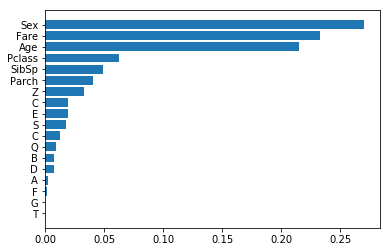

In [46]:
import numpy as np
# Calculate feature importances
importances = clf.feature_importances_

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

In [47]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "n_estimators": [1,5,10,50],
              "max_features": [1, 3, 10],
              "max_features": ['auto', 'sqrt', 'log2'],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X,y)

# Print the optimal parameters
print(grid_search.best_params_)


{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 10}


In [48]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Instantiate the classifier
clf = RandomForestClassifier( bootstrap= False, criterion= 'entropy', max_depth= 3, max_features= 'auto')
clf1 = RandomForestClassifier( bootstrap= True, criterion= 'gini', max_depth= None, max_features= 'sqrt')
# Fit to the training data
clf.fit(X_train, y_train)
clf1.fit(X_train, y_train)
# Predict the labels of the test set
y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
print("----------------")
print(confusion_matrix(y_test, y_pred1))
print("----------------")

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print("The precision score is : ", precision_score(y_test, y_pred))
print("The second precision score is : ", precision_score(y_test, y_pred1))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print("The recall score is : ", recall_score(y_test, y_pred))
print("The second recall score is : ", recall_score(y_test, y_pred1))

[[138  19]
 [ 42  69]]
----------------
[[138  19]
 [ 42  69]]
----------------
The precision score is :  0.7840909090909091
The second precision score is :  0.7840909090909091
The recall score is :  0.6216216216216216
The second recall score is :  0.6216216216216216


In [49]:
test_data = pd.read_csv("test.csv")
test_data.head(15)
# print(train_data.columns)



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [50]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan' and 'Int_Plan'
test_data['Sex'] = test_data['Sex'].replace({'male':0 , 'female':1})

# Print the results to verify
print(test_data['Sex'].head())
#print(train_data['Cabin'].head())
test_data.info()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 11 columns):
PassengerId    419 non-null int64
Pclass         419 non-null int64
Name           419 non-null object
Sex            419 non-null int64
Age            332 non-null float64
SibSp          419 non-null int64
Parch          419 non-null int64
Ticket         419 non-null object
Fare           418 non-null float64
Cabin          92 non-null object
Embarked       419 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [51]:
test_data['Age'].fillna(age_mean_value, inplace = True)

test_data.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,NaN,S


In [52]:
test_data['Cabin'].fillna('Z1', inplace = True)
test_data['Letter_Cabin']=test_data.Cabin.apply(lambda x: re.findall('^[a-zA-Z]', x)[0])

test_data.info()
test_data.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 12 columns):
PassengerId     419 non-null int64
Pclass          419 non-null int64
Name            419 non-null object
Sex             419 non-null int64
Age             419 non-null float64
SibSp           419 non-null int64
Parch           419 non-null int64
Ticket          419 non-null object
Fare            418 non-null float64
Cabin           419 non-null object
Embarked        419 non-null object
Letter_Cabin    419 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.4+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Letter_Cabin
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,Z1,Q,Z
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,Z1,S,Z
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,Z1,Q,Z
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,Z1,S,Z
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,Z1,S,Z
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,Z1,S,Z
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,Z1,Q,Z
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,Z1,S,Z
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,Z1,C,Z
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,Z1,S,Z


In [53]:
test_data['Embarked'].unique()

# Perform one hot encoding on 'State'
test_data_Emb = pd.get_dummies(test_data['Embarked'])

# Print the head of telco_state
print(test_data_Emb.head())
test_data['Embarked'].unique()

#New_train_data = pd.merge(left=train_data,right=train_data_Emb,left_on="PassengerId",right_on="C")
test_data = pd.concat([test_data,test_data_Emb], axis=1)
#New_train_data.head(20)
print(test_data.head(15))
test_data.tail(5)


   C  Q  S
0  0  1  0
1  0  0  1
2  0  1  0
3  0  0  1
4  0  0  1
    PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Letter_Cabin,C,Q,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,Z1,S,Z,0,0,1
416,1308,3,"Ware, Mr. Frederick",0,29.699118,0,0,359309,8.0500,Z1,S,Z,0,0,1
417,1309,3,"Peter, Master. Michael J",0,29.699118,1,1,2668,22.3583,Z1,C,Z,1,0,0
418,1310,3,"Peter, Master. Michael J",0,29.699118,1,1,2668,22.3583,T28,C,T,1,0,0


In [54]:
test_data['Letter_Cabin'].unique()

# Perform one hot encoding on 'State'
test_data_Cab = pd.get_dummies(test_data['Letter_Cabin'])

# Print the head of telco_state
print(test_data_Cab.head(15))
test_data['Letter_Cabin'].unique()

#New_train_data = pd.merge(left=train_data,right=train_data_Emb,left_on="PassengerId",right_on="C")
test_data = pd.concat([test_data,test_data_Cab], axis=1)
#New_train_data.head(20)
test_data.head(15)

    A  B  C  D  E  F  G  T  Z
0   0  0  0  0  0  0  0  0  1
1   0  0  0  0  0  0  0  0  1
2   0  0  0  0  0  0  0  0  1
3   0  0  0  0  0  0  0  0  1
4   0  0  0  0  0  0  0  0  1
5   0  0  0  0  0  0  0  0  1
6   0  0  0  0  0  0  0  0  1
7   0  0  0  0  0  0  0  0  1
8   0  0  0  0  0  0  0  0  1
9   0  0  0  0  0  0  0  0  1
10  0  0  0  0  0  0  0  0  1
11  0  0  0  0  0  0  0  0  1
12  0  1  0  0  0  0  0  0  0
13  0  0  0  0  0  0  0  0  1
14  0  0  0  0  1  0  0  0  0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,S,A,B,C,D,E,F,G,T,Z
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,Z1,...,0,0,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,Z1,...,1,0,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,Z1,...,0,0,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,Z1,...,1,0,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,Z1,...,1,0,0,0,0,0,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,Z1,...,1,0,0,0,0,0,0,0,0,1
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,Z1,...,0,0,0,0,0,0,0,0,0,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,Z1,...,1,0,0,0,0,0,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,Z1,...,0,0,0,0,0,0,0,0,0,1
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,Z1,...,1,0,0,0,0,0,0,0,0,1


In [55]:
# Drop the unnecessary features
test_data = test_data.drop(test_data[['PassengerId','Name','Ticket','Cabin','Embarked','Letter_Cabin']], axis=1)

test_data['Age']=test_data['Age'].astype('int64')
#telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']
print(test_data.columns)
test_data.info()

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'A',
       'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 18 columns):
Pclass    419 non-null int64
Sex       419 non-null int64
Age       419 non-null int64
SibSp     419 non-null int64
Parch     419 non-null int64
Fare      418 non-null float64
C         419 non-null uint8
Q         419 non-null uint8
S         419 non-null uint8
A         419 non-null uint8
B         419 non-null uint8
C         419 non-null uint8
D         419 non-null uint8
E         419 non-null uint8
F         419 non-null uint8
G         419 non-null uint8
T         419 non-null uint8
Z         419 non-null uint8
dtypes: float64(1), int64(5), uint8(12)
memory usage: 24.6 KB


### Attention, comme il existait une cabine T dans le train_data, j'ai du rajouter un autre index pour créer la cabine T dans le test_data (c'est le PassengerId 1310 qui n'existait pas dans le fichier de référence)

In [26]:
y_prediction = clf.predict(test_data.iloc[0:50])
print(y_prediction)
y_prediction1 = clf1.predict(test_data.iloc[0:50])
print(y_prediction1)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1]
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1]


In [27]:
y_prediction = clf.predict(test_data.iloc[50:100])
print(y_prediction)
y_prediction1 = clf1.predict(test_data.iloc[50:100])
print(y_prediction1)

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0]
[0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1
 0 1 1 1 0 1 0 0 0 1 0 0 0]


In [28]:
y_prediction = clf.predict(test_data.iloc[100:150])
print(y_prediction)
y_prediction1 = clf.predict(test_data.iloc[100:150])
print(y_prediction1)

[1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0]
[1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0]


In [56]:
y_prediction = clf.predict(test_data.iloc[150:200])
print(y_prediction)
y_prediction1 = clf.predict(test_data.iloc[150:200])
print(y_prediction1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_prediction4 = clf.predict(test_data.iloc[200:250])
print(y_prediction4)

In [ ]:
y_prediction5 = clf.predict(test_data.iloc[250:300])
print(y_prediction5)

In [ ]:
y_prediction6 = clf.predict(test_data.iloc[300:350])
print(y_prediction6)

In [ ]:
y_prediction7 = clf.predict(test_data.iloc[350:400])
print(y_prediction7)

In [ ]:
y_prediction8 = clf.predict(test_data.iloc[400:419])
print(y_prediction8)